In [2]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
comp_fail = pd.read_csv("train_data.csv",index_col=0)

In [3]:
print(comp_fail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, jobID1634295 to jobID1165709
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   memory_GB            20000 non-null  float64
 1   network_log10_MBps   20000 non-null  float64
 2   local_IO_log10_MBps  20000 non-null  float64
 3   NFS_IO_log10_MBps    20000 non-null  float64
 4   failed               20000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 937.5+ KB
None


In [86]:
comp_fail.columns

Index(['memory_GB', 'network_log10_MBps', 'local_IO_log10_MBps',
       'NFS_IO_log10_MBps', 'failed'],
      dtype='object')

In [93]:
cat_cols = [col for col in comp_fail.columns if comp_fail[col].dtypes == 'O']

for col in comp_fail:
    print(comp_fail[col].value_counts(), "\n\n")

4.9981     5
5.0095     4
5.0535     4
9.8129     4
7.4236     4
          ..
25.8651    1
16.4559    1
29.0406    1
29.7149    1
21.4721    1
Name: memory_GB, Length: 18620, dtype: int64 


 2.8821    29
 3.2080    25
 3.2343    13
 2.8823    12
 3.2345    12
           ..
 3.1117     1
 1.9422     1
 0.5732     1
 1.1902     1
-1.4519     1
Name: network_log10_MBps, Length: 16402, dtype: int64 


-0.7196    6
-0.6231    6
-0.6070    6
 0.1870    6
-0.6857    6
          ..
 0.9775    1
 0.2174    1
-0.9128    1
-0.3553    1
-0.4670    1
Name: local_IO_log10_MBps, Length: 13774, dtype: int64 


-3.0000    10101
-2.9175       74
-2.9210       52
-2.9138       50
-2.9097       46
           ...  
 0.0284        1
 1.6651        1
-0.6852        1
 0.4415        1
-0.4670        1
Name: NFS_IO_log10_MBps, Length: 8114, dtype: int64 


0    18374
1     1626
Name: failed, dtype: int64 




In [96]:
comp_fail.isna().sum()

memory_GB              0
network_log10_MBps     0
local_IO_log10_MBps    0
NFS_IO_log10_MBps      0
failed                 0
dtype: int64

In [26]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = ["Working"],
            y = comp_fail[comp_fail["failed"]== 0]["failed"].value_counts().values,
            name='Working'
    )

trace1 = go.Bar(
            x = ["Failed"],
            y = comp_fail[comp_fail["failed"]== 1]["failed"].value_counts().values,
            name='Failed'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Failure Variable'
    ),
    title='Failure Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [4]:
#Percentage of Failure
non_fail_count =int(comp_fail[comp_fail["failed"]== 0]["failed"].value_counts())
fail_count = int(comp_fail[comp_fail["failed"]== 1]["failed"].value_counts())
print((fail_count/(non_fail_count+fail_count)*100),"%")
print((non_fail_count/(non_fail_count+fail_count)*100),"%")

8.129999999999999 %
91.86999999999999 %


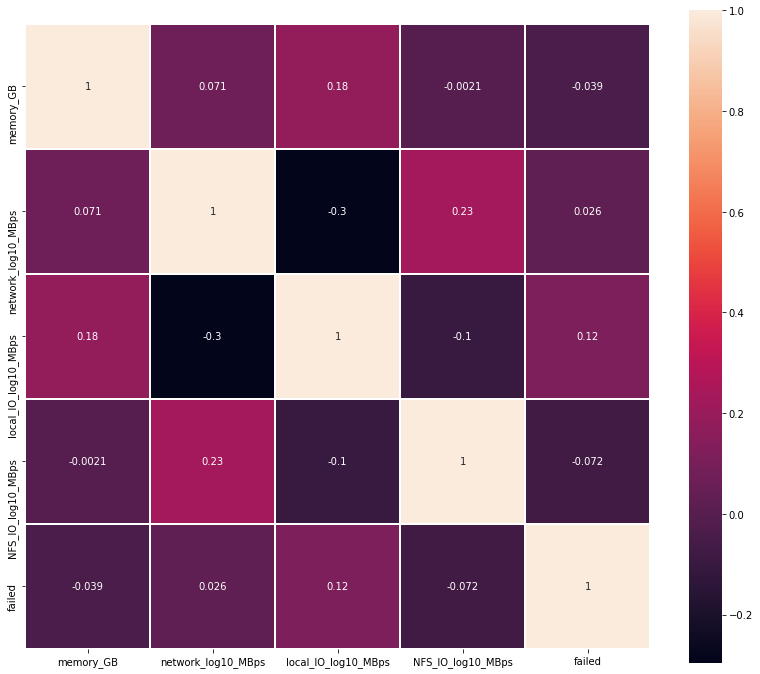

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(comp_fail.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler

<h1>This is with not standardising the dataset<h1>

In [261]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
#X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.705735 (0.021864)
CART: 0.703091 (0.021797)
NB: 0.500000 (0.000000)
RF: 0.687786 (0.020260)
RFB: 0.797995 (0.015892)
BBC: 0.786020 (0.023110)
SVM: 0.652310 (0.018634)
XGB: 0.673282 (0.020775)
RFBW: 0.686886 (0.020242)
LRBW: 0.653284 (0.017133)
RUS: 0.718879 (0.021600)
RUS: 0.718810 (0.024298)


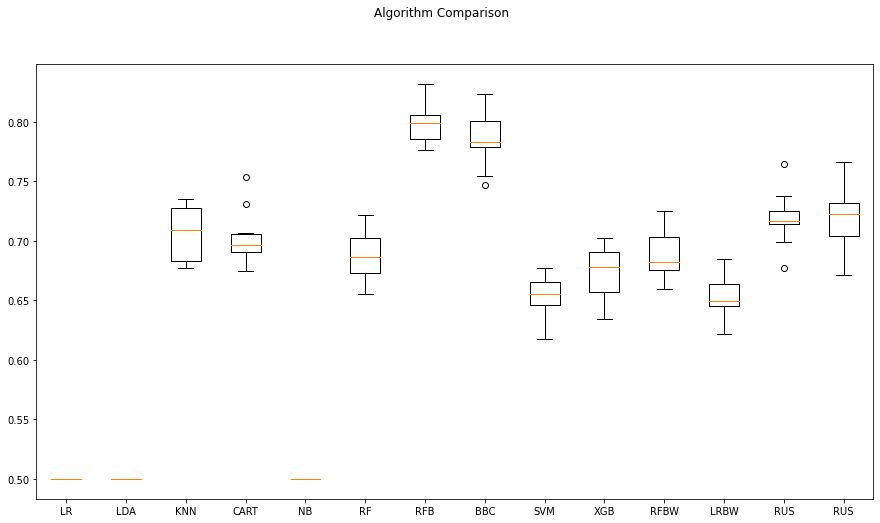

In [176]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.921200
LDA: 0.921200
KNN: 0.861799
CART: 0.691417
NB: 0.921200
RF: 0.878213
RFB: 0.623987
BBC: 0.635893
SVM: 0.908831
XGB: 0.900326
RFBW: 0.886182
LRBW: 0.544817
RUS: 0.583329
RUS: 0.577885


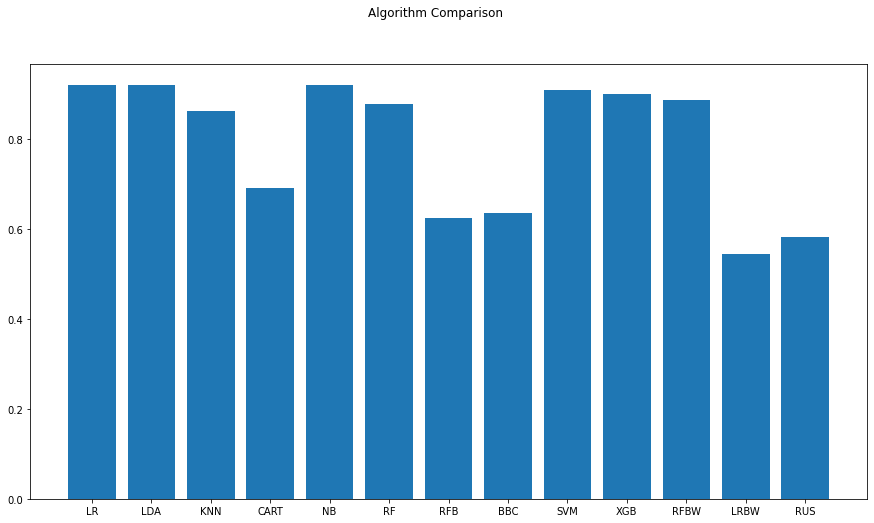

In [262]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

<h1>This is with standardising the dataset<h1>

In [75]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.691979 (0.013106)
CART: 0.705262 (0.025179)
NB: 0.500000 (0.000000)
RF: 0.687100 (0.018538)
RFB: 0.796942 (0.016883)
BBC: 0.792549 (0.017749)
SVM: 0.499963 (0.000110)
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

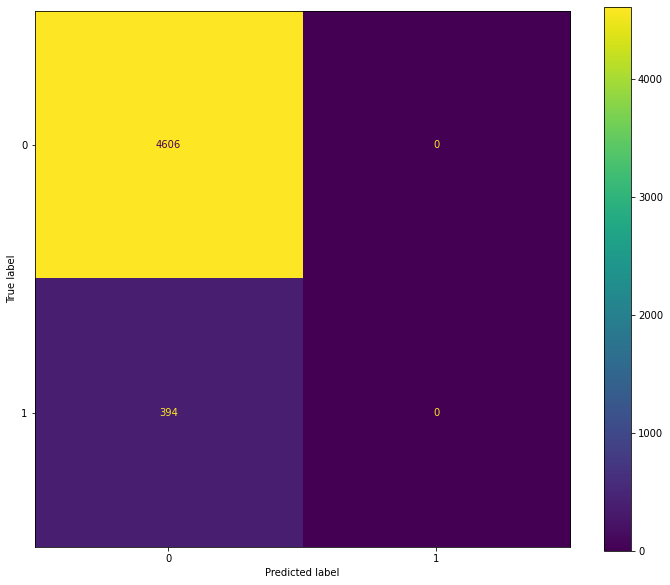

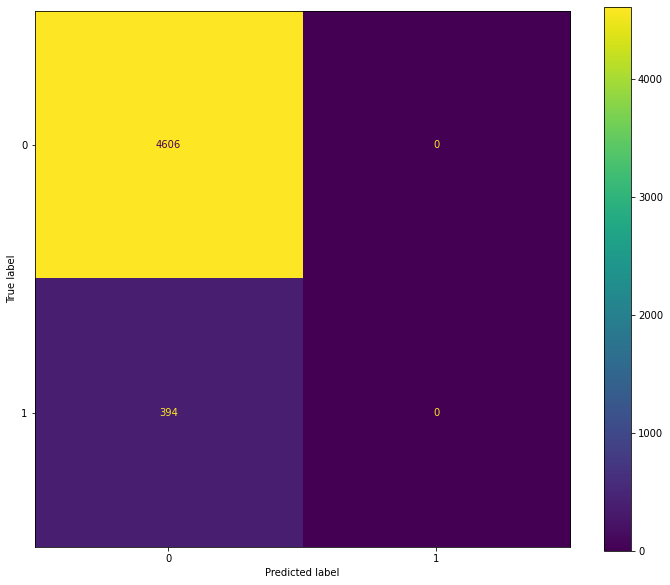

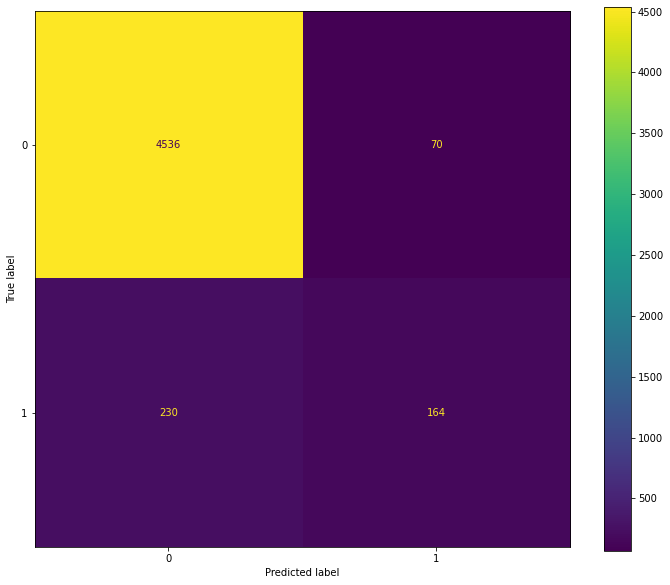

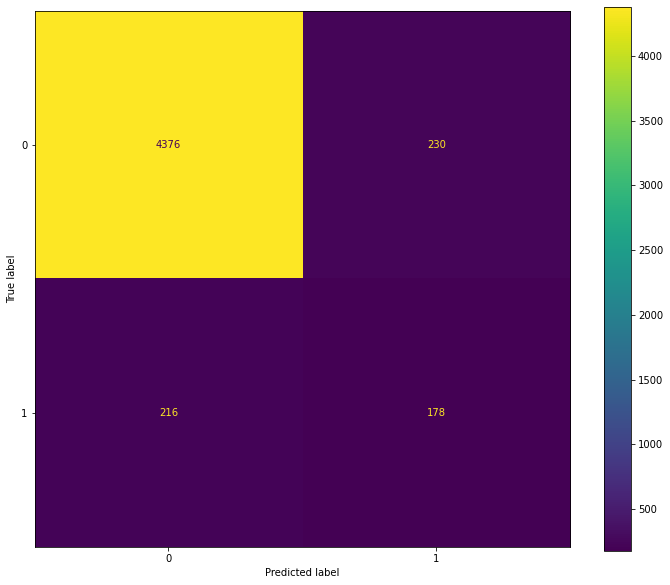

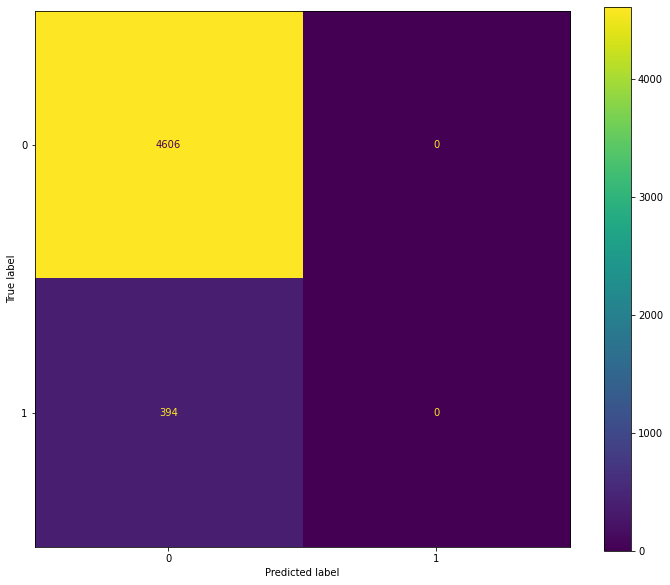

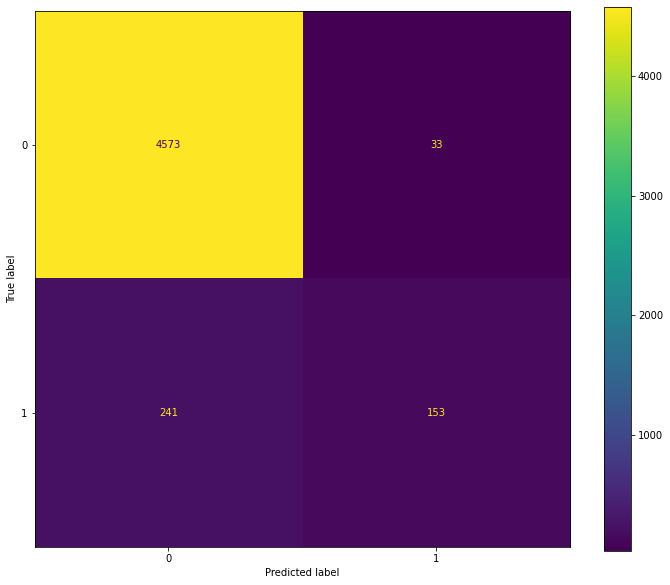

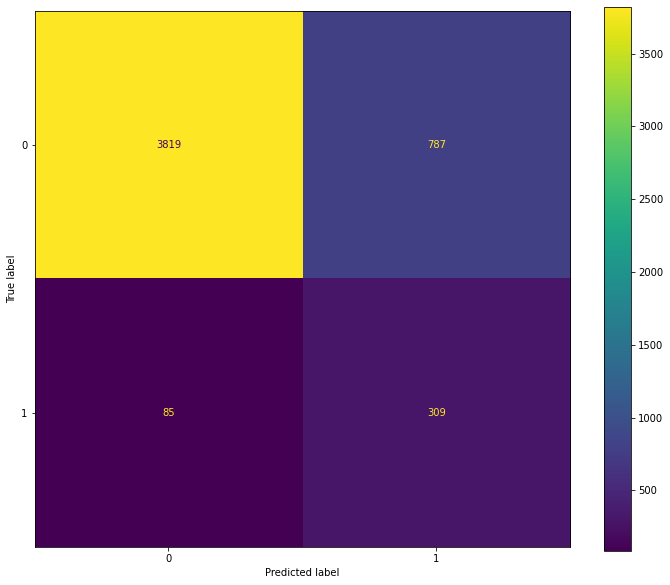

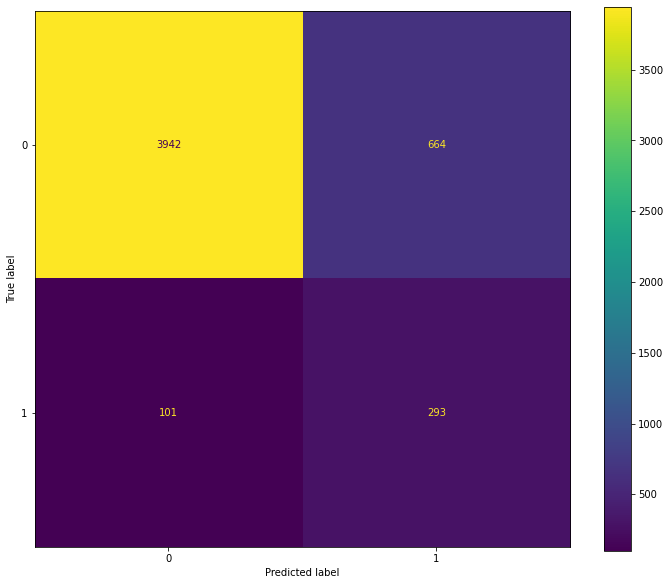

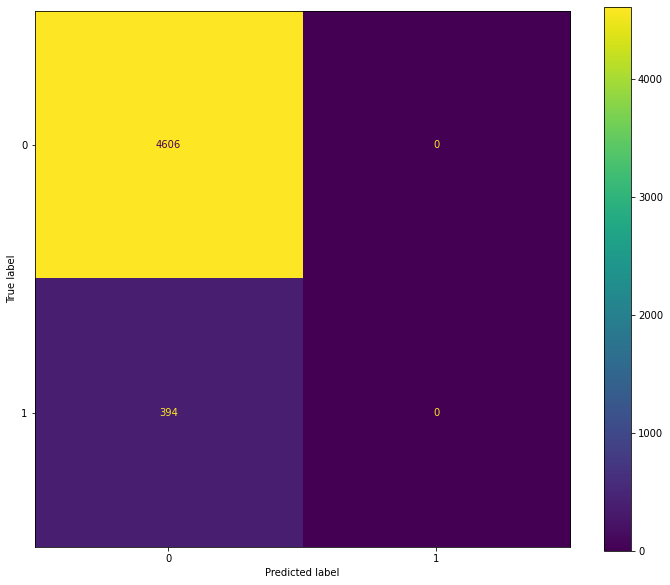

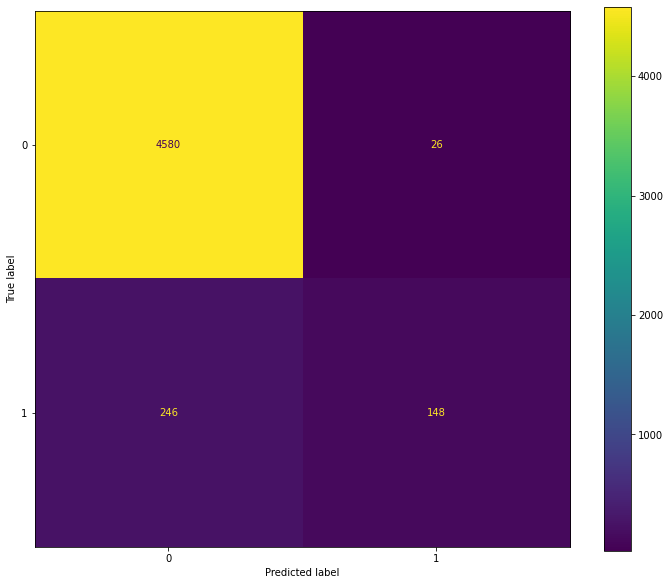

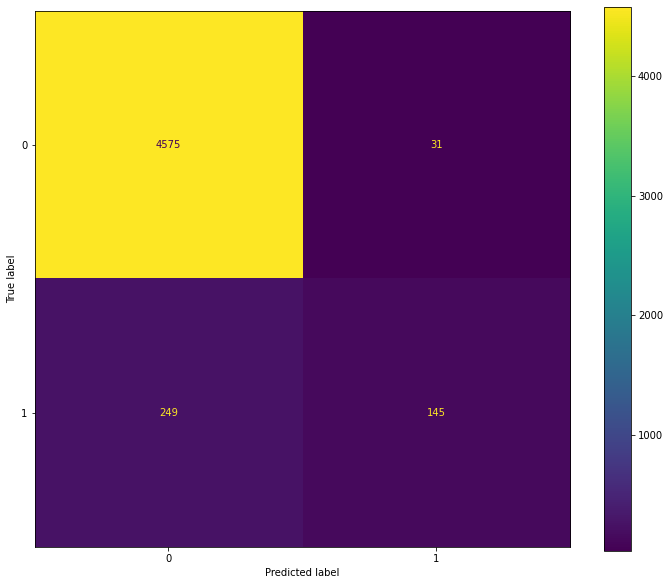

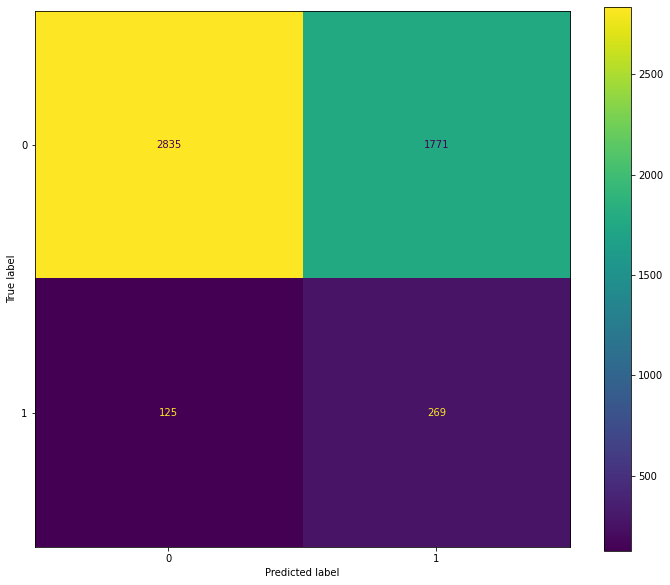

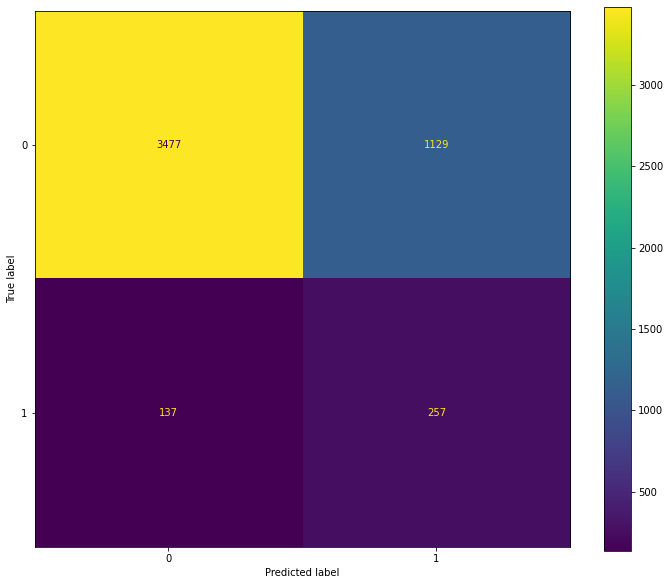

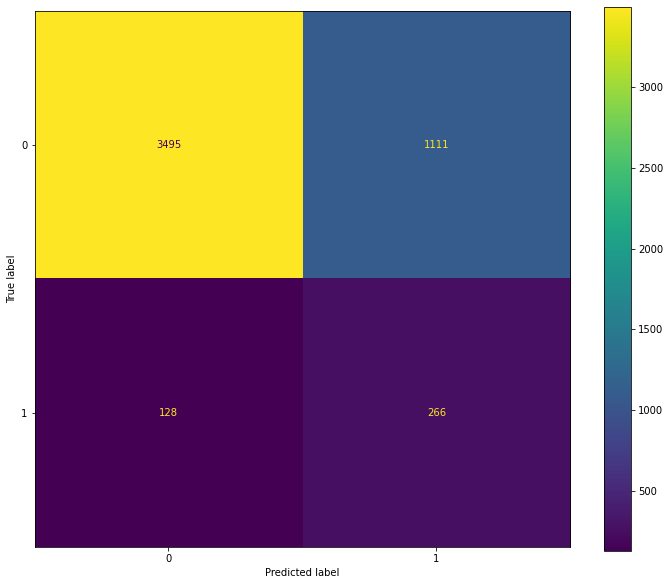

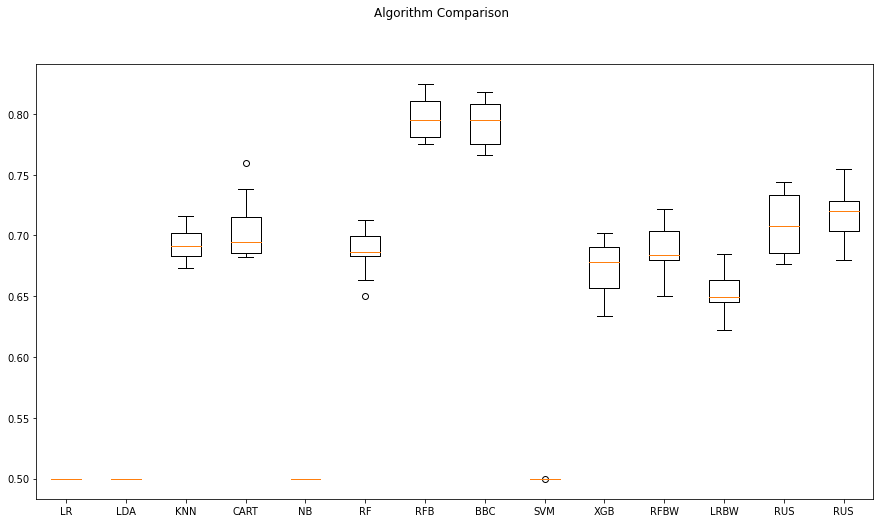

In [76]:
from sklearn.metrics import plot_confusion_matrix
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        plot_confusion_matrix(model, X_test, y_test)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.921200
LDA: 0.921200
KNN: 0.826298
CART: 0.686027
NB: 0.921200
RF: 0.873583
RFB: 0.630797
BBC: 0.640906
SVM: 0.921200
XGB: 0.899800
RFBW: 0.885592
LRBW: 0.544817
RUS: 0.575962
RUS: 0.577995


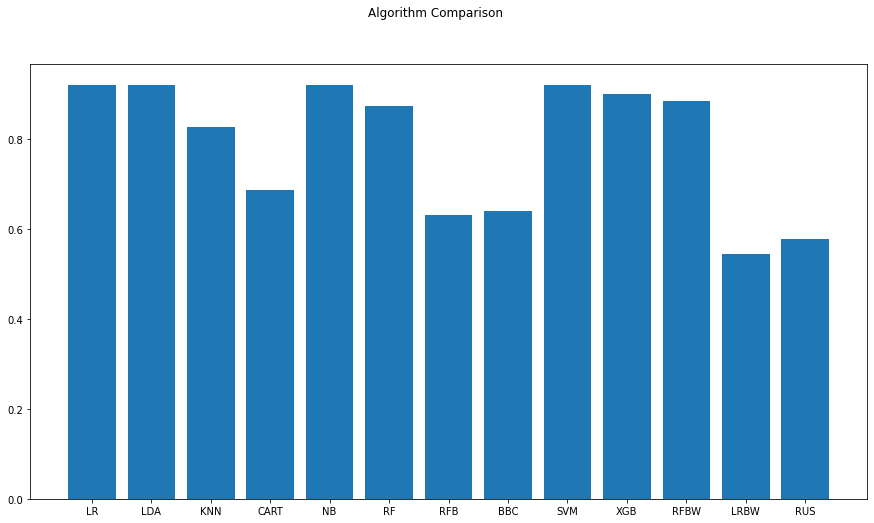

In [243]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

OVersampling the data and checking

In [77]:
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [78]:
bool_train_labels = y != 0

In [79]:
bool_train_labels

array([False, False, False, ..., False, False, False])

In [80]:
pos_features = X[bool_train_labels]
neg_features = X[~bool_train_labels]

pos_labels = y[bool_train_labels]
neg_labels = y[~bool_train_labels]

In [81]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(18374, 4)

In [82]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape


(36748, 4)

In [86]:
resampled_labels

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [87]:
unique_elements, counts_elements = np.unique(resampled_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [18374 18374]]


In [88]:
np.mean(resampled_features),np.std(resampled_features)

(0.014047871010862231, 0.9518335113041784)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(resampled_features, resampled_labels, test_size = 0.25, random_state=42)

LR: 0.650347 (0.007225)
LDA: 0.649927 (0.007862)
KNN: 0.922563 (0.005075)
CART: 0.969305 (0.003929)
NB: 0.616911 (0.009958)
RF: 0.986135 (0.002227)
RFB: 0.985197 (0.002041)
BBC: 0.896508 (0.004258)
SVM: 0.727932 (0.009637)
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

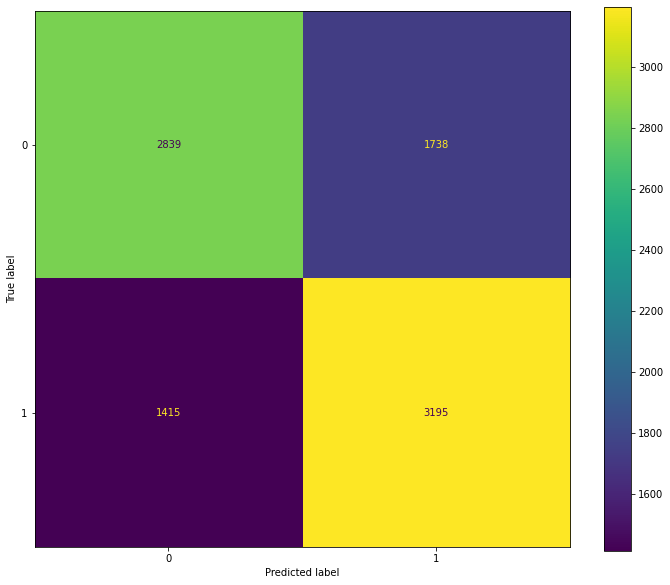

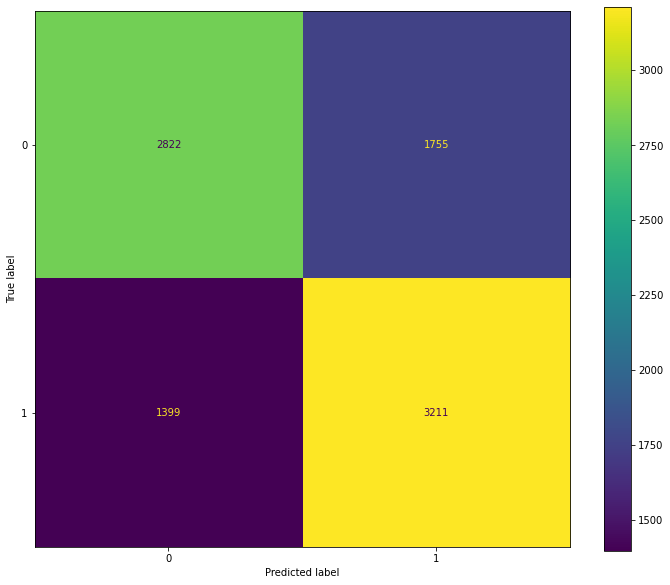

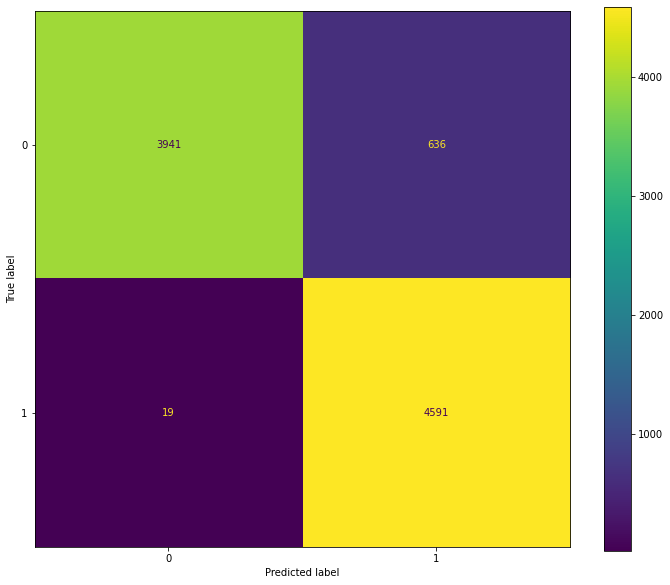

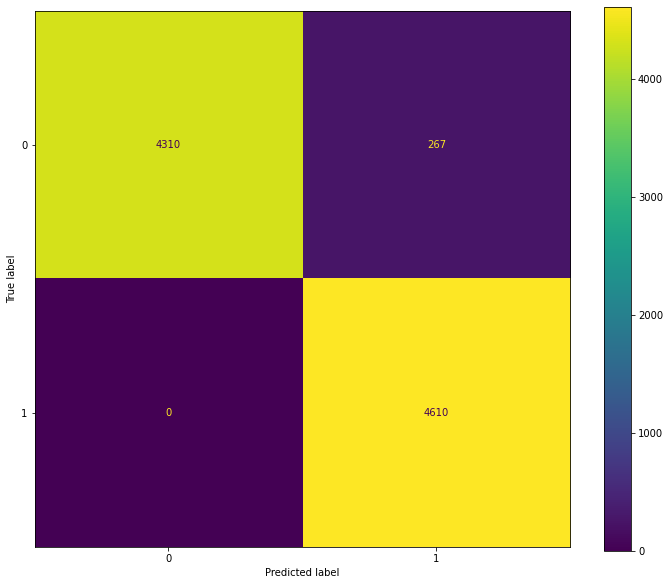

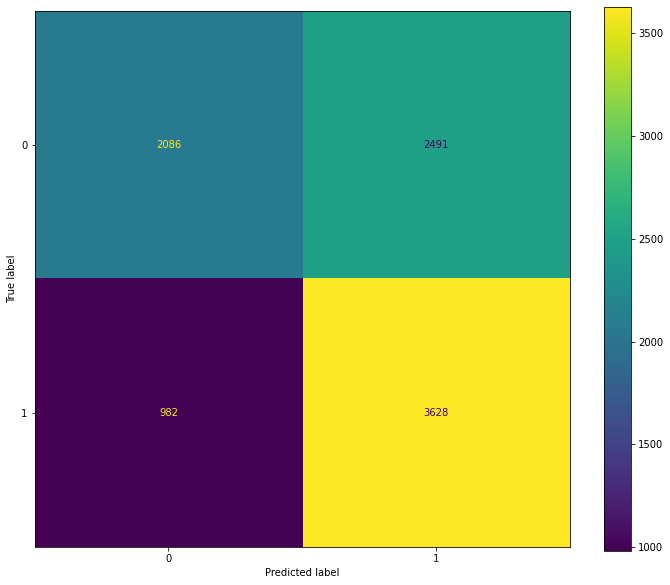

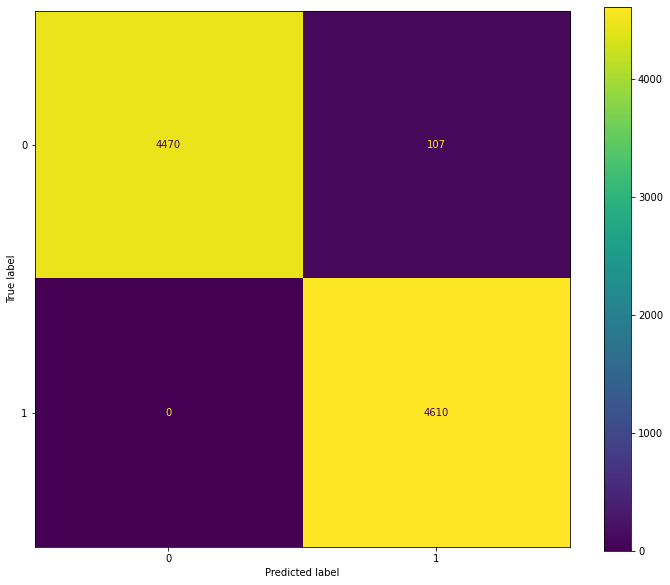

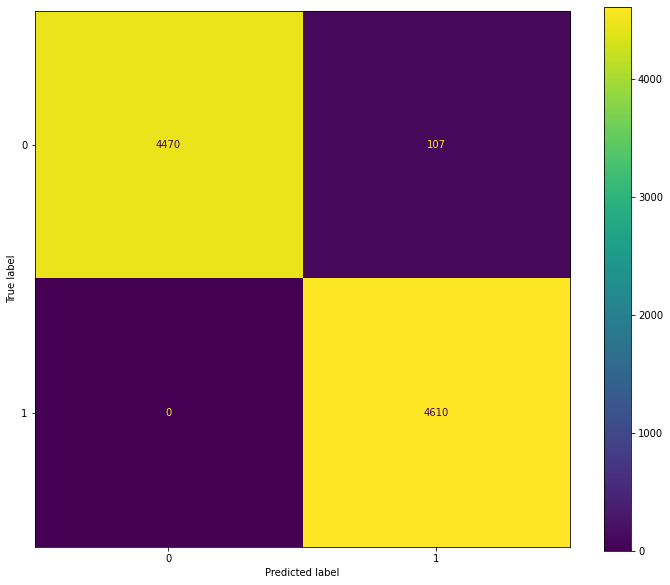

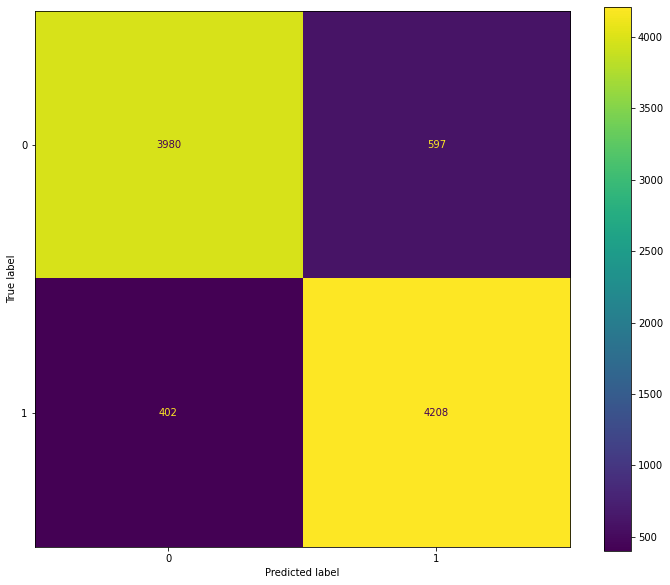

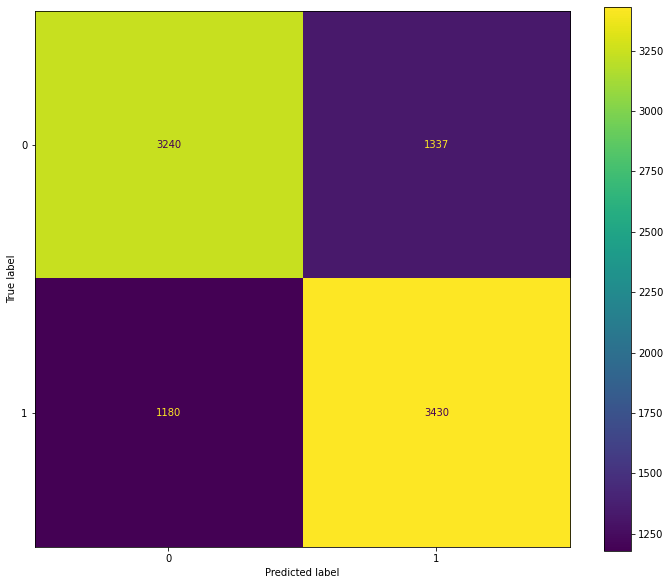

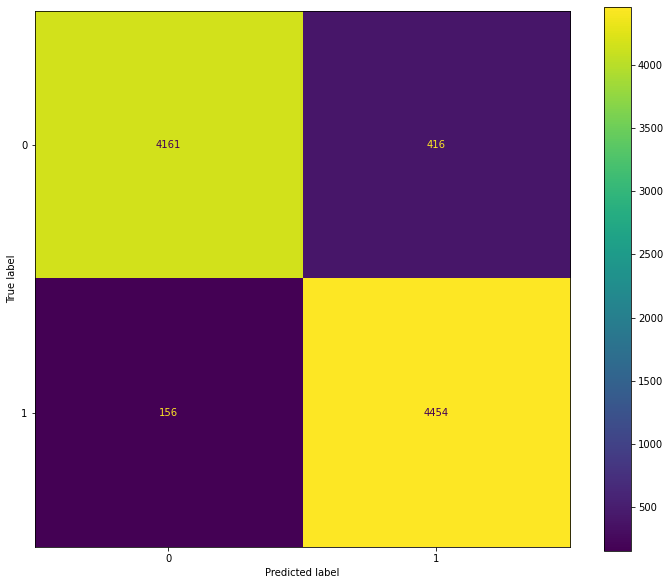

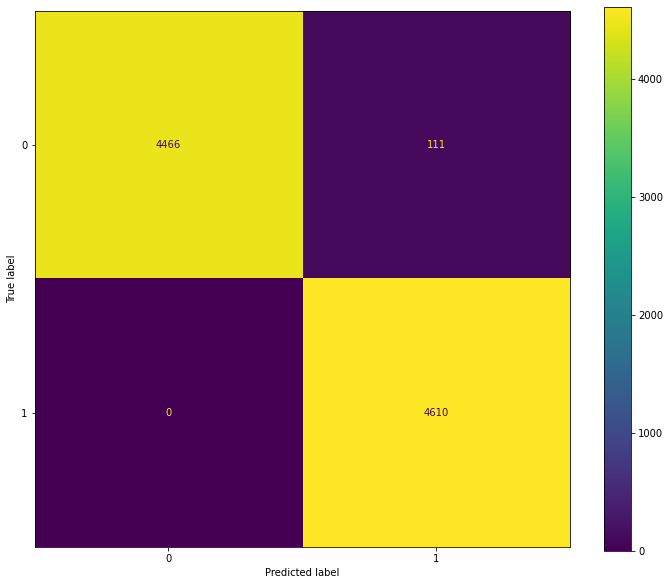

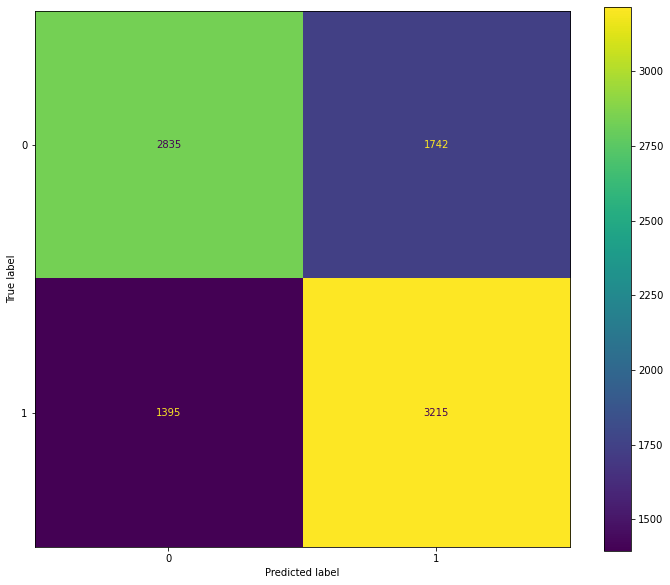

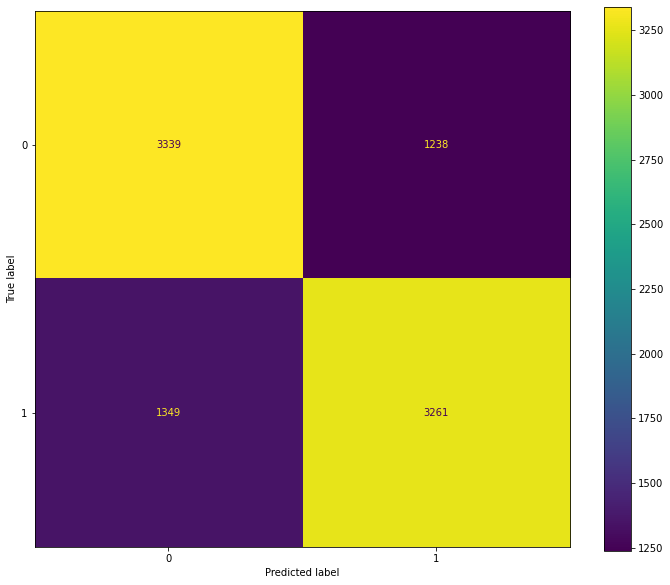

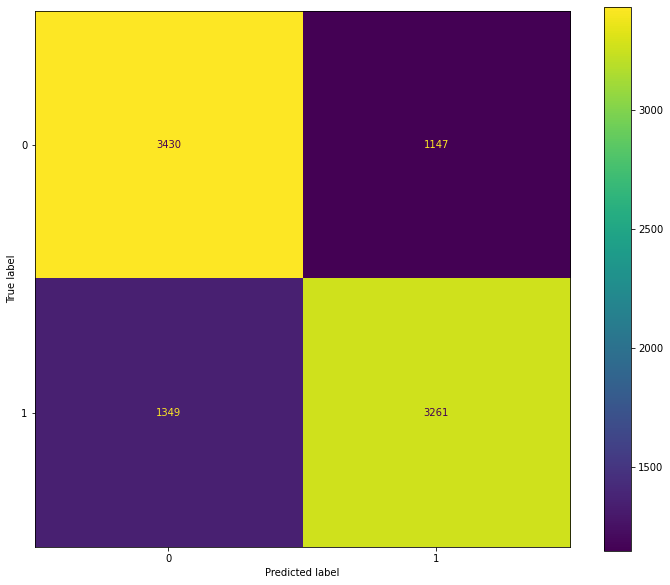

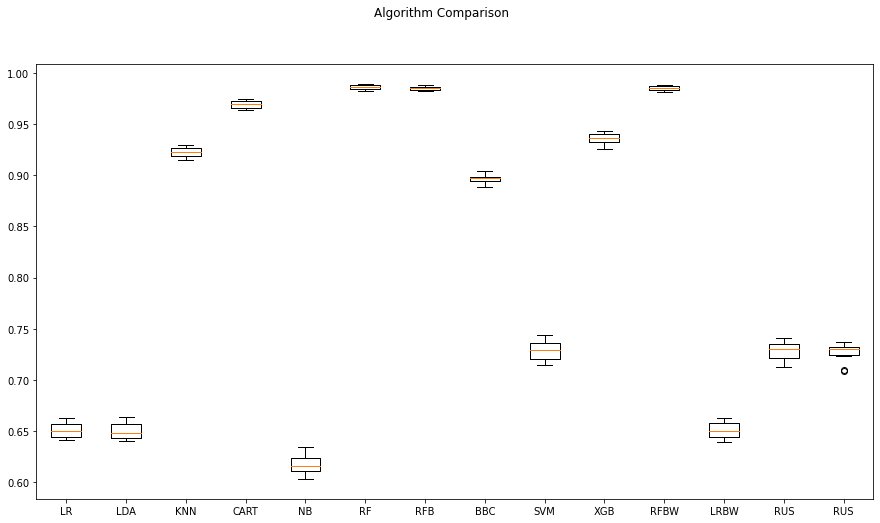

In [90]:
from sklearn.metrics import plot_confusion_matrix
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        plot_confusion_matrix(model, X_test, y_test)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.657525
LDA: 0.657579
KNN: 0.936763
CART: 0.972530
NB: 0.636415
RF: 0.987315
RFB: 0.986800
BBC: 0.889397
SVM: 0.726281
C:\Users\nil\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
XGB: 0.939221
RFBW: 0.987521
LRBW: 0.659395
RUS: 0.720447
RUS: 0.724545


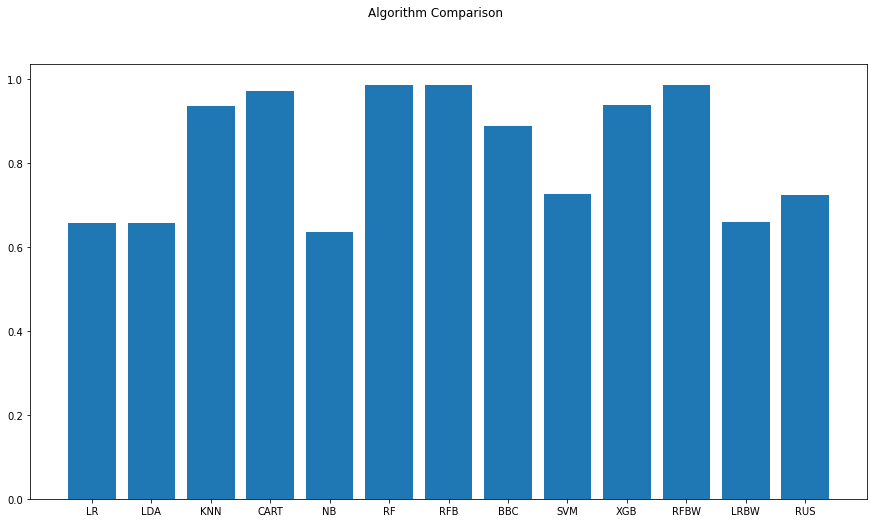

In [91]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

<h1>PCA<h1>

In [264]:
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [265]:
from sklearn.decomposition import PCA

pca_comp = PCA(n_components =3,random_state=seed)
prin_comp = pca_comp.fit_transform(X)
#prin_comp_df = pd.DataFrame(data = prin_comp,columns = ['Feature1', 'Feature2','Feature3'])

In [218]:
prin_comp

array([[ 2.05425511,  0.31813486, -0.20301524],
       [ 0.94459458, -0.73246714,  0.40692641],
       [ 1.30413633,  2.17758137,  1.54776246],
       ...,
       [-0.69245315, -0.02194841,  1.06047048],
       [-2.01531582,  0.07052293, -0.49845849],
       [-1.24820209, -0.59021599, -0.55464809]])

In [219]:
#prin_comp_df

,Feature1,Feature2,Feature3
0,2.054255,0.318135,-0.203015
1,0.944595,-0.732467,0.406926
2,1.304136,2.177581,1.547762
3,-1.676341,2.126822,-0.990496
4,-1.045299,-0.152905,1.398989
...,...,...,...
19995,2.269149,0.701558,-0.167317
19996,-0.461257,-0.075528,0.905162
19997,-0.692453,-0.021948,1.060470
19998,-2.015316,0.070523,-0.498458


In [220]:
#prin_comp_df.columns

Index(['Feature1', 'Feature2', 'Feature3'], dtype='object')

In [266]:
#Creating the X and y variables
#X = comp_fail.drop('failed', 1).values
#y = comp_fail["failed"].values
#X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(prin_comp, y, test_size = 0.25, random_state=42)

In [263]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.705735 (0.021864)
CART: 0.704660 (0.023300)
NB: 0.500000 (0.000000)


KeyboardInterrupt: 

In [231]:
model = BalancedRandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

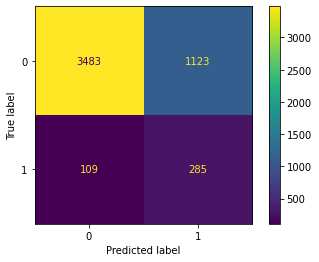

In [229]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [232]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(prediction, y_test)

0.5894470974959465

LR: 0.921200
LDA: 0.921200
KNN: 0.820094
CART: 0.663383
NB: 0.921200
RF: 0.879207
RFB: 0.589293
BBC: 0.594022
SVM: 0.921200
XGB: 0.840825
RFBW: 0.875679
LRBW: 0.515233
RUS: 0.540905
RUS: 0.541023


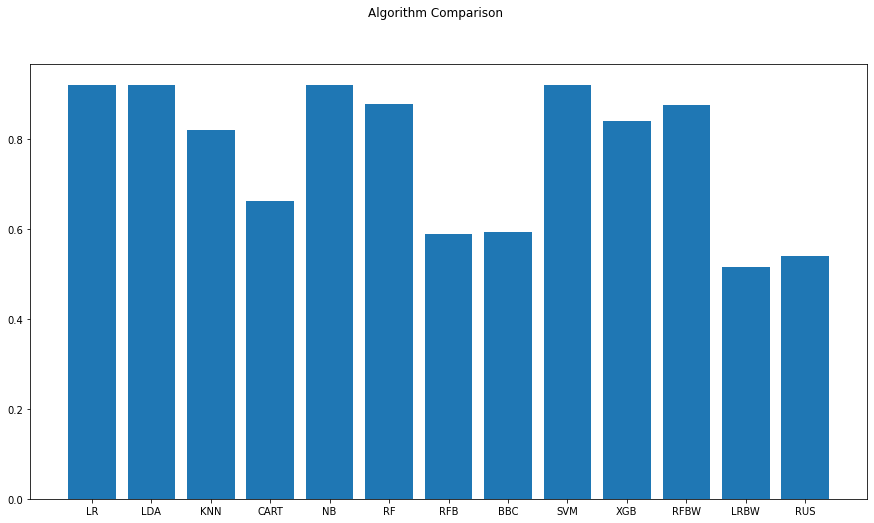

In [240]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

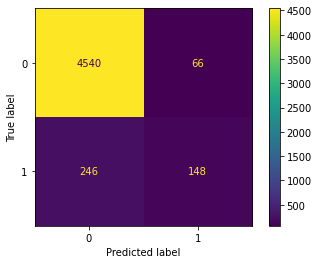

In [237]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test)

NEURAL NETWORK

In [140]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [183]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [184]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [185]:
cleaned_df = comp_fail.copy()

In [186]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.25,random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25,random_state=42)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('failed'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('failed'))
test_labels = np.array(test_df.pop('failed'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [187]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -5, 5)
#val_features = np.clip(val_features, -5, 5)
#test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (11250,)
Validation labels shape: (3750,)
Test labels shape: (5000,)
Training features shape: (11250, 4)
Validation features shape: (3750, 4)
Test features shape: (5000, 4)


In [188]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [189]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [190]:
model = make_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                80        
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.predict(train_features[:10])

array([[0.58800113],
       [0.7334411 ],
       [0.58472127],
       [0.56975955],
       [0.5928427 ],
       [0.656521  ],
       [0.7601993 ],
       [0.72818375],
       [0.56498635],
       [0.60620517]], dtype=float32)

In [192]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9694


In [193]:
neg, pos = np.bincount(comp_fail['failed'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 20000
    Positive: 1626 (8.13% of total)



In [194]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.42481361])

In [195]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.03516919],
       [0.08903254],
       [0.07140352],
       [0.04277145],
       [0.09889258],
       [0.07411616],
       [0.09331113],
       [0.09344273],
       [0.03244823],
       [0.06446188]], dtype=float32)

In [196]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2868


In [197]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [198]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [199]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [200]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

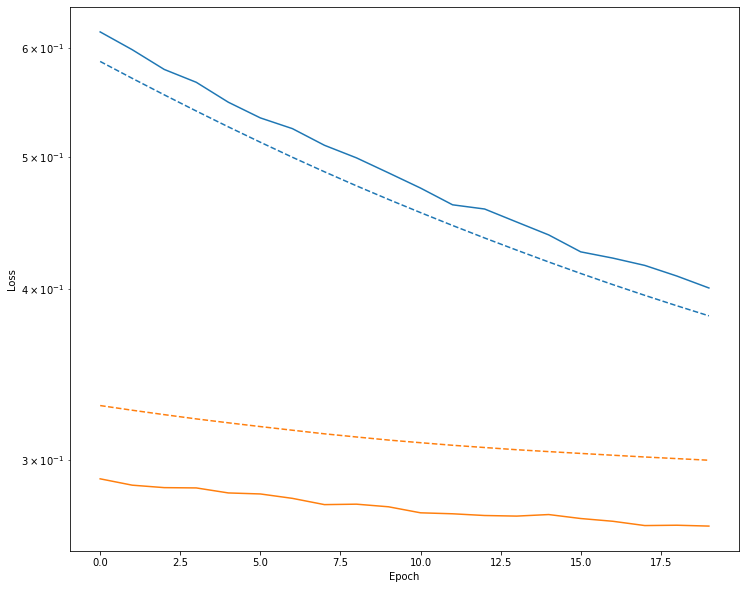

In [201]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [202]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
6/6 [==============================] - 4s 292ms/step - loss: 0.2945 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 10405.2857 - fn: 947.5714 - accuracy: 0.9160 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5534 - prc: 0.1002 - val_loss: 0.3290 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3398.0000 - val_fn: 352.0000 - val_accuracy: 0.9061 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4859 - val_prc: 0.0923
Epoch 2/100
6/6 [==============================] - 0s 44ms/step - loss: 0.2834 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 7014.1429 - fn: 588.7143 - accuracy: 0.9231 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5005 - prc: 0.0776 - val_loss: 0.3264 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3398.0000 - val_fn: 352.0000 - val_accuracy: 0.9061 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4992 - val_prc: 0.0944
Epoch 3/100
6/6 [==============================] - 0s 43ms/step - loss: 0.2826 - tp: 0.0000e+00 - fp: 

In [203]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

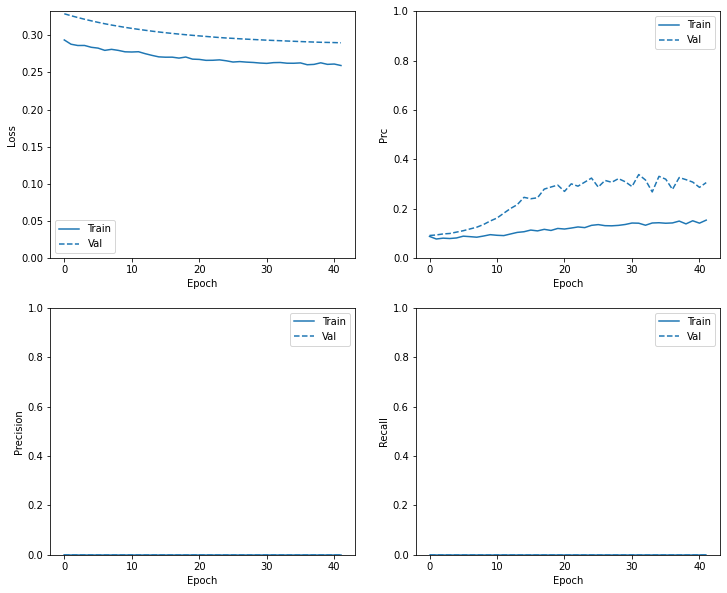

In [204]:
plot_metrics(baseline_history)

In [205]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [206]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2578285336494446
tp :  0.0
fp :  0.0
tn :  4606.0
fn :  394.0
accuracy :  0.9211999773979187
precision :  0.0
recall :  0.0
auc :  0.7219676971435547
prc :  0.3108115792274475

Legitimate Transactions Detected (True Negatives):  4606
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  394
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  394


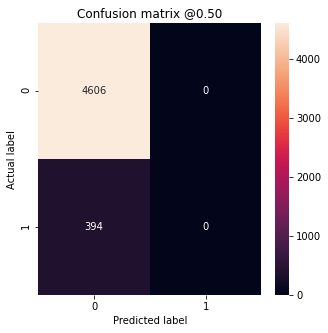

In [207]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [208]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

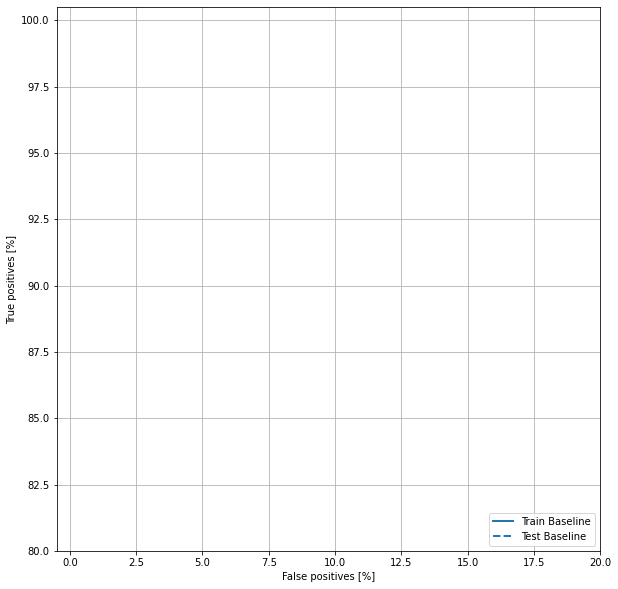

In [209]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [210]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

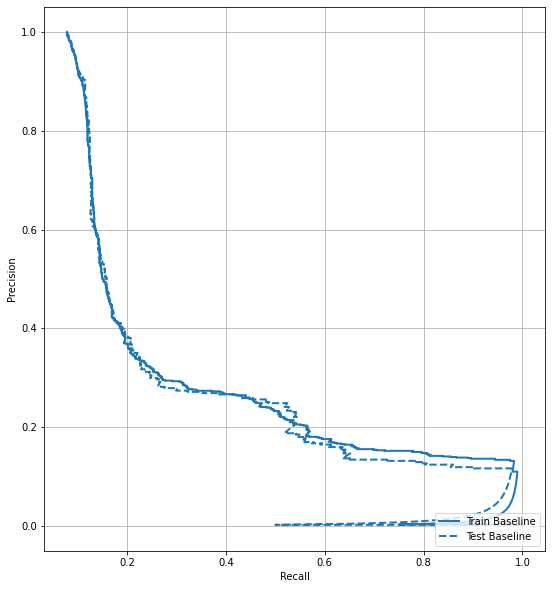

In [211]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [212]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.54
Weight for class 1: 6.15


In [213]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


Epoch 54/100
6/6 [==============================] - 0s 43ms/step - loss: 0.7664 - tp: 181.7143 - fp: 1329.0000 - tn: 5686.1429 - fn: 406.0000 - accuracy: 0.7736 - precision: 0.1242 - recall: 0.3167 - auc: 0.5931 - prc: 0.1110 - val_loss: 0.4452 - val_tp: 76.0000 - val_fp: 256.0000 - val_tn: 3142.0000 - val_fn: 276.0000 - val_accuracy: 0.8581 - val_precision: 0.2289 - val_recall: 0.2159 - val_auc: 0.6946 - val_prc: 0.1703
Epoch 55/100
6/6 [==============================] - 0s 42ms/step - loss: 0.7727 - tp: 192.0000 - fp: 1371.5714 - tn: 5638.1429 - fn: 401.1429 - accuracy: 0.7664 - precision: 0.1210 - recall: 0.3206 - auc: 0.5864 - prc: 0.1031 - val_loss: 0.4479 - val_tp: 76.0000 - val_fp: 277.0000 - val_tn: 3121.0000 - val_fn: 276.0000 - val_accuracy: 0.8525 - val_precision: 0.2153 - val_recall: 0.2159 - val_auc: 0.6962 - val_prc: 0.1706
Epoch 56/100
6/6 [==============================] - 0s 42ms/step - loss: 0.7810 - tp: 185.7143 - fp: 1387.1429 - tn: 5615.1429 - fn: 414.8571 - accur

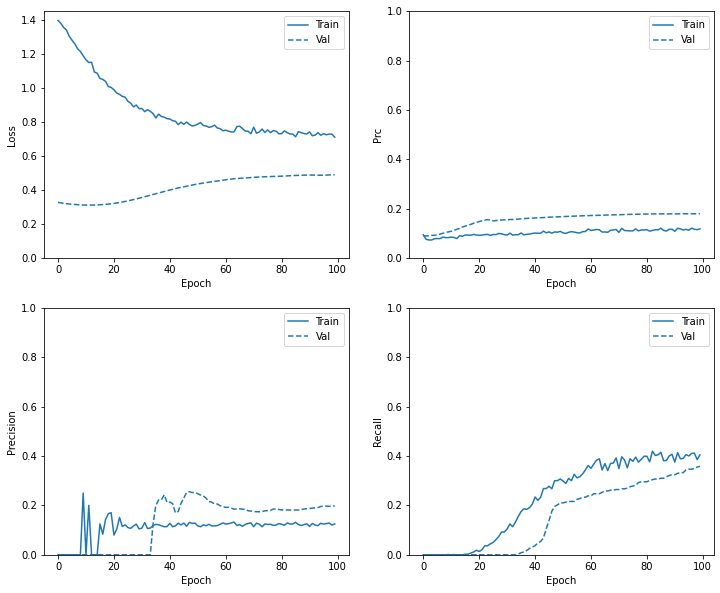

In [214]:
plot_metrics(weighted_history)

In [215]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.48985394835472107
tp :  141.0
fp :  680.0
tn :  3926.0
fn :  253.0
accuracy :  0.8133999705314636
precision :  0.171741783618927
recall :  0.3578680157661438
auc :  0.7083262801170349
prc :  0.14824549853801727

Legitimate Transactions Detected (True Negatives):  3926
Legitimate Transactions Incorrectly Detected (False Positives):  680
Fraudulent Transactions Missed (False Negatives):  253
Fraudulent Transactions Detected (True Positives):  141
Total Fraudulent Transactions:  394


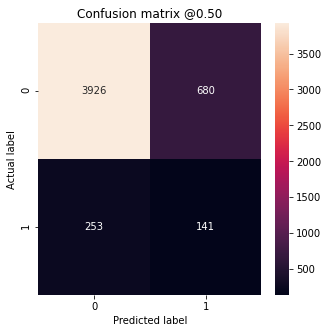

In [216]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

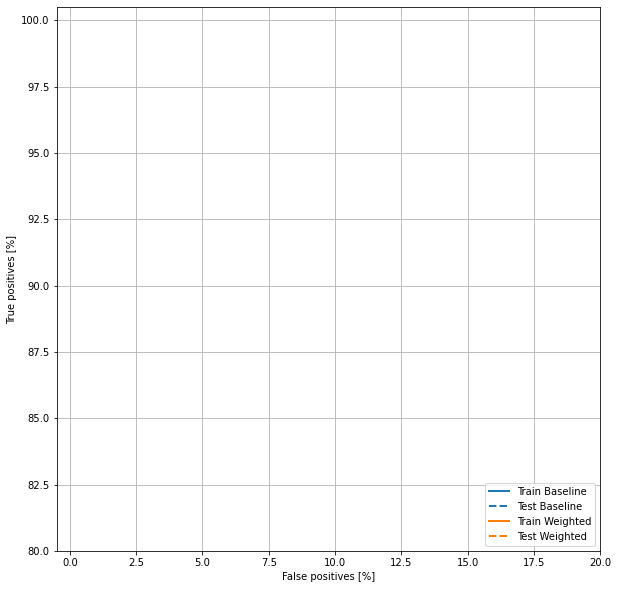

In [217]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

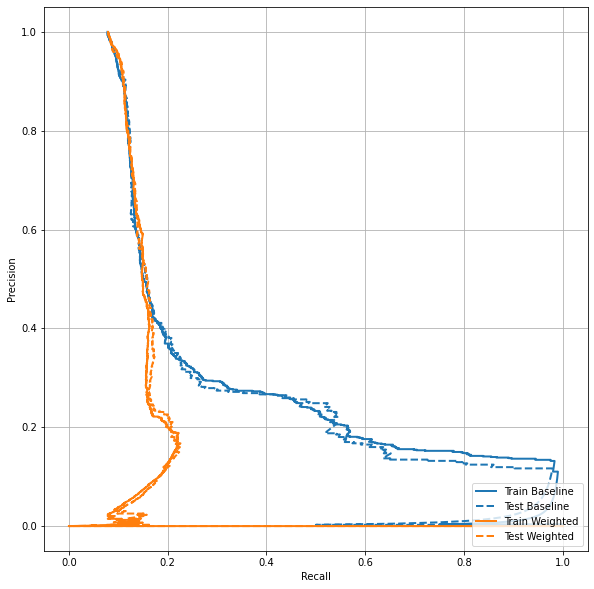

In [218]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [219]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [220]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(10370, 4)

In [221]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(20740, 4)

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

In [222]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
18/18 [==============================] - 4s 115ms/step - loss: 0.7802 - tp: 3475.3684 - fp: 4312.8947 - tn: 10547.8947 - fn: 7036.0526 - accuracy: 0.5714 - precision: 0.4283 - recall: 0.3261 - auc: 0.5401 - prc: 0.4117 - val_loss: 0.6213 - val_tp: 131.0000 - val_fp: 1161.0000 - val_tn: 2237.0000 - val_fn: 221.0000 - val_accuracy: 0.6315 - val_precision: 0.1014 - val_recall: 0.3722 - val_auc: 0.5130 - val_prc: 0.0978
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 0.7442 - tp: 4138.5789 - fp: 3845.4737 - tn: 6265.2105 - fn: 6122.9474 - accuracy: 0.5091 - precision: 0.5211 - recall: 0.3980 - auc: 0.5103 - prc: 0.5191 - val_loss: 0.6363 - val_tp: 162.0000 - val_fp: 1213.0000 - val_tn: 2185.0000 - val_fn: 190.0000 - val_accuracy: 0.6259 - val_precision: 0.1178 - val_recall: 0.4602 - val_auc: 0.5741 - val_prc: 0.1150
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 0.7250 - tp: 4738.8421 - fp: 4123.6316 - tn: 6056.4211 - fn: 545

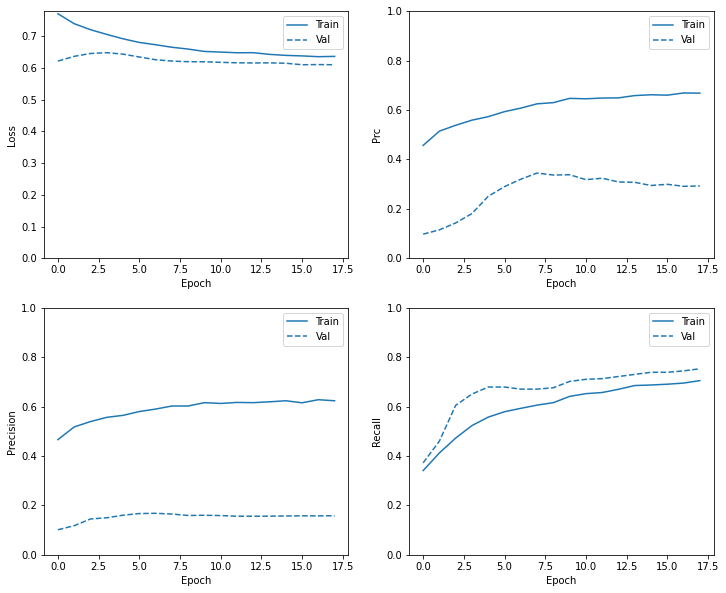

In [223]:
plot_metrics(resampled_history)

In [224]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 4s 105ms/step - loss: 0.7731 - tp: 4130.2381 - fp: 5345.4762 - tn: 9281.8095 - fn: 7422.9524 - accuracy: 0.5182 - precision: 0.4131 - recall: 0.3620 - auc: 0.4948 - prc: 0.4215 - val_loss: 0.6248 - val_tp: 143.0000 - val_fp: 1190.0000 - val_tn: 2208.0000 - val_fn: 209.0000 - val_accuracy: 0.6269 - val_precision: 0.1073 - val_recall: 0.4062 - val_auc: 0.5197 - val_prc: 0.0996
Epoch 2/1000
20/20 [==============================] - 1s 32ms/step - loss: 0.7463 - tp: 4597.4762 - fp: 4277.5238 - tn: 6907.9524 - fn: 6647.5238 - accuracy: 0.5105 - precision: 0.5160 - recall: 0.4020 - auc: 0.5072 - prc: 0.5092 - val_loss: 0.6394 - val_tp: 165.0000 - val_fp: 1225.0000 - val_tn: 2173.0000 - val_fn: 187.0000 - val_accuracy: 0.6235 - val_precision: 0.1187 - val_recall: 0.4688 - val_auc: 0.5878 - val_prc: 0.1205
Epoch 3/1000
20/20 [==============================] - 1s 32ms/step - loss: 0.7199 - tp: 5496.1905 - fp: 4538.2857 - tn: 6563.7143 - fn: 5

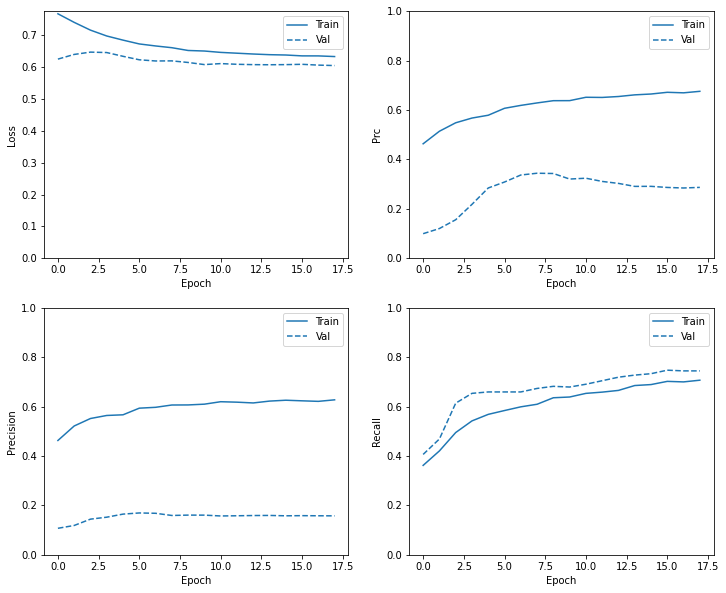

In [225]:
plot_metrics(resampled_history)

In [226]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6191504597663879
tp :  249.0
fp :  1690.0
tn :  2916.0
fn :  145.0
accuracy :  0.6330000162124634
precision :  0.12841671705245972
recall :  0.6319797039031982
auc :  0.7237762212753296
prc :  0.3106331527233124

Legitimate Transactions Detected (True Negatives):  2916
Legitimate Transactions Incorrectly Detected (False Positives):  1690
Fraudulent Transactions Missed (False Negatives):  145
Fraudulent Transactions Detected (True Positives):  249
Total Fraudulent Transactions:  394


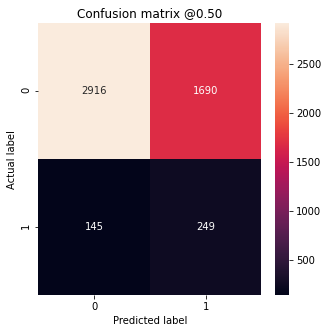

In [227]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

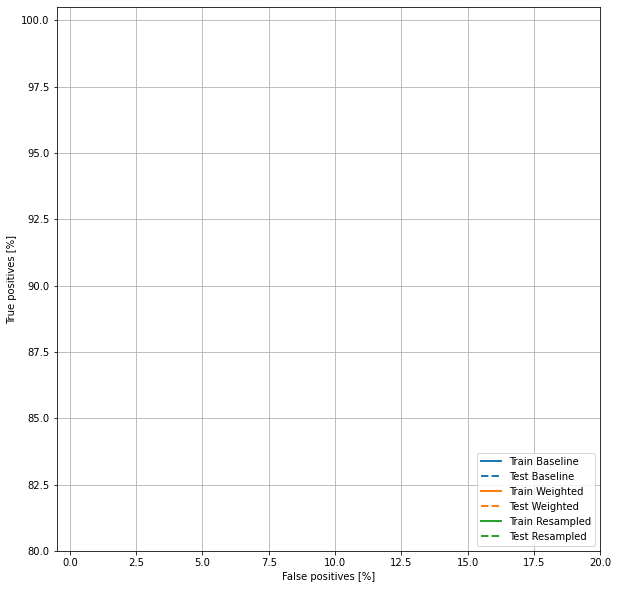

In [228]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

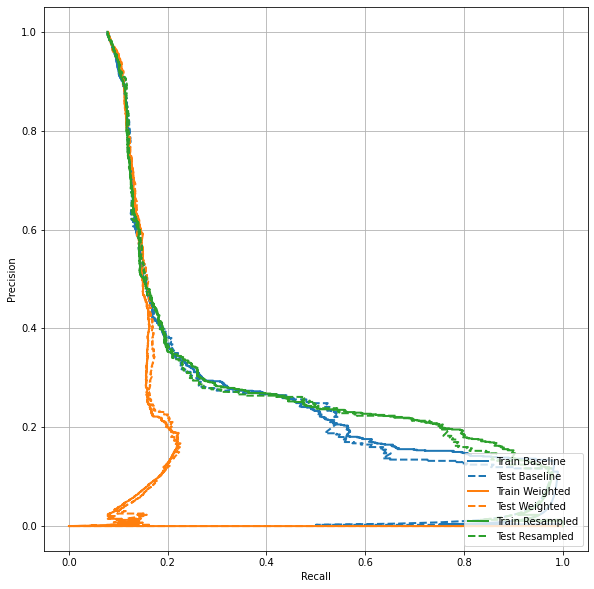

In [229]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')